# Exercise 5

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
data = np.loadtxt('microchips.csv', delimiter=',', dtype='float64')

In [98]:
X = data[:, :2]
y = data[:, 2:]
y = y.ravel()

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
def mapFeature(X1,X2,D): # Pyton
    one = np.ones([len(X1),1])
    Xe = np.c_[one,X1,X2] # Start with [1,X1,X2]
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j # type (N)
            Xnew = Xnew.reshape(-1,1) # type (N,1) required by append
            Xe = np.append(Xe,Xnew,1) # axis = 1 ==> append column
    return Xe

In [114]:
def plot_decision_boundary_contour(degree, ax, clf, X, Y, cmap='Paired_r'):
    h = 0.01
    x_min, x_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h 
    y_min, y_max = X[:,2].min() - 10*h, X[:,2].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    points = mapFeature(xx.ravel(), yy.ravel(), degree)
    Z = clf.predict(points)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(X[:,1], X[:,2], c=Y, cmap=cmap, edgecolors='k');

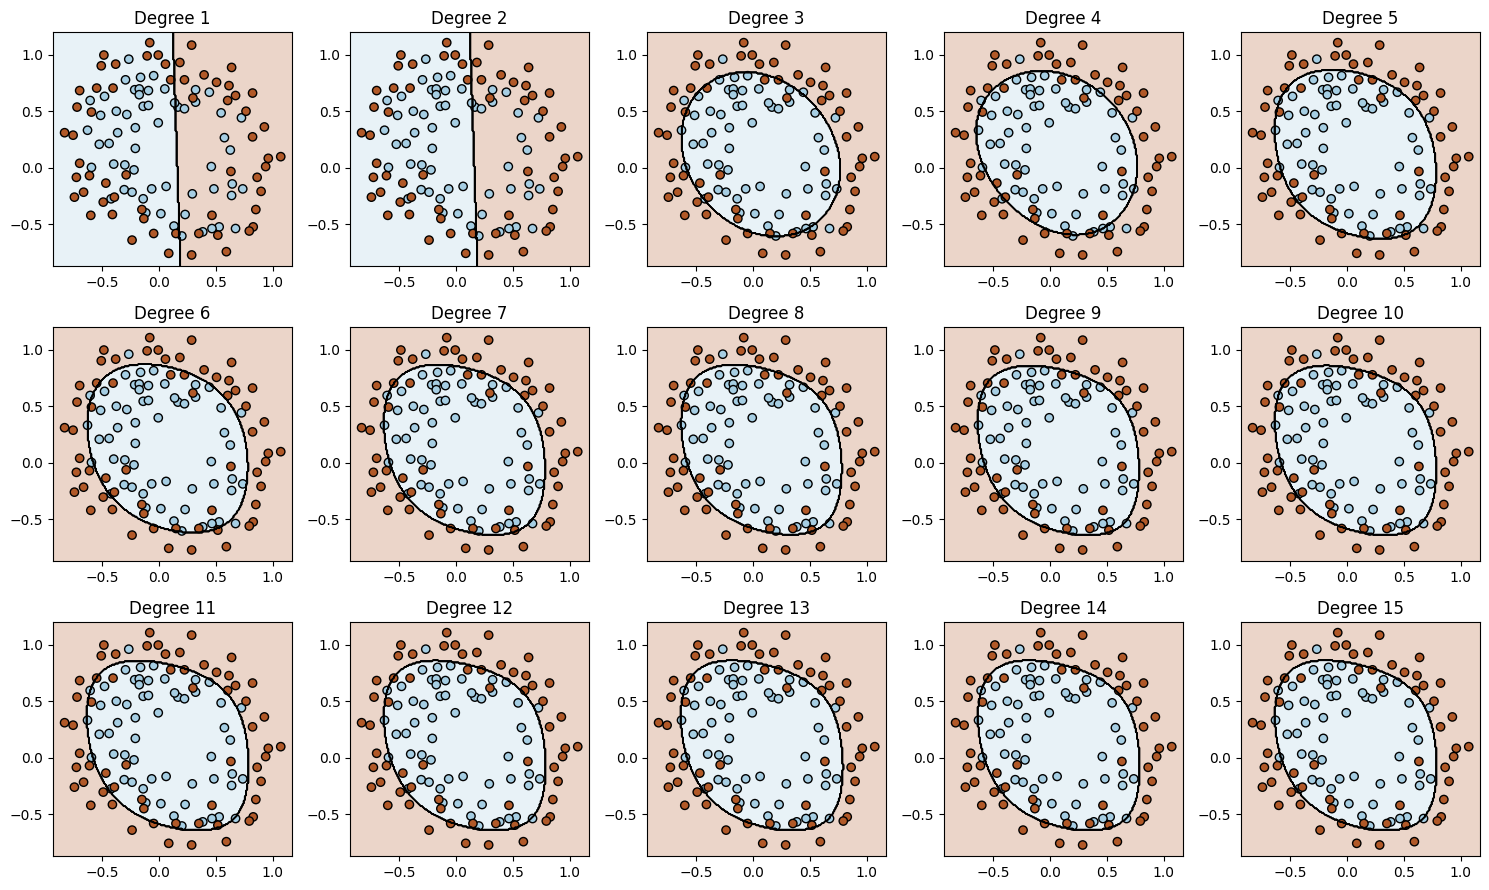

In [115]:
from sklearn import svm
import time

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

time_records_linear = []
for i, ax in enumerate(axes.flatten()):
    time_to_measure = 0
    for _ in range(3):
        tic = time.time()
        explicit_model = svm.SVC(kernel='linear')
        Xe = mapFeature(X[:,0], X[:,1], i)
        explicit_model.fit(Xe, y)
        toc = time.time()
        time_to_measure += (toc - tic)
    plot_decision_boundary_contour(i, ax, explicit_model, Xe, y)
    ax.set_title(f'Degree {i+1}')
    time_records_linear.append(time_to_measure/3)

plt.tight_layout()
plt.show()

In [116]:
def plot_decision_boundary_contour_poly(degree, ax, clf, X, Y, cmap='Paired_r'):
    h = 0.01
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

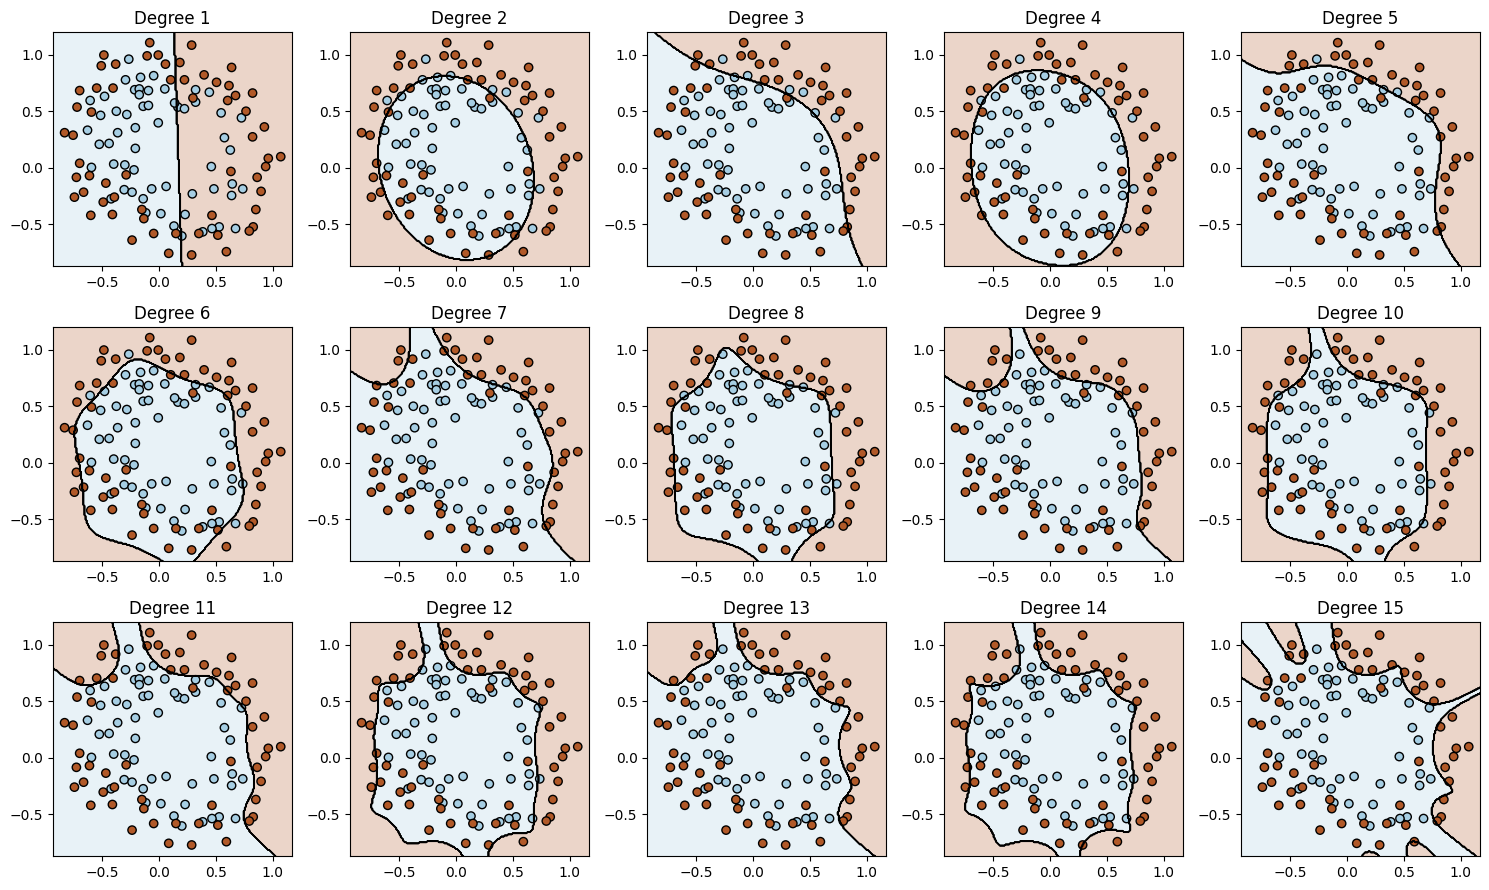

In [117]:
time_records_poly = []

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, ax in enumerate(axes.flatten()):
    time_to_measure = 0
    for _ in range(3):
        tic = time.time()
        implicit_model = svm.SVC(kernel='poly', degree=i+1)
        # Xe = mapFeature(X[:,0], X[:,1], i)
        implicit_model.fit(X, y)
        toc = time.time()
        time_to_measure += (toc - tic)
    plot_decision_boundary_contour_poly(i, ax, implicit_model, X, y)
    ax.set_title(f'Degree {i+1}')
    time_records_poly.append(time_to_measure/3)

plt.tight_layout()
plt.show()

In [ ]:
for i in range(15):
    print(f"For degree {i}:", end="  ")
    print(time_records_linear[i], end=" - ")
    print(time_records_poly[i])